In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import  f1_score

from dataset import PolarisPublicationData

In [2]:
def calc_F1(data, average_kind='weighted'):
    f1_score_list = []
    n_decoders = data.shape[1]
    for i in tqdm(range(2, n_decoders)):
        decoder = data.columns[i]
        gt = np.array(data.GT_id).astype(int)
        results = np.array(data[decoder]).astype(int)
        score = f1_score(gt, results, average=average_kind)
        f1_score_list.append(score)
    
    return f1_score_list

In [3]:
data = PolarisPublicationData()

In [4]:
all_data = data.load_data(figure='S7')

In [5]:
# all_data.dropout_rate = np.round(all_data.dropout_rate, 1)

In [6]:
dropout_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [7]:
results = pd.DataFrame(columns=[['decoder'] + list(np.round(dropout_list, 1))])
results['decoder'] = ['Relaxed Bernoulli', 'Multivariate Normal', 'Distance Matching', 'PoSTcode']
for val in dropout_list:
#     val = np.round(val, 1)
    data = all_data.loc[all_data.dropout_rate==val]
    results[val] = calc_F1(data)

100%|█████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]


In [8]:
results

,decoder,0.0,0.1,0.2,0.3,0.4,0.5
0,Relaxed Bernoulli,0.999962,0.976321,0.927162,0.857103,0.760570,0.627553
1,Multivariate Normal,0.984619,0.847927,0.698018,0.544605,0.375801,0.242614
2,Distance Matching,0.999968,0.965086,0.885501,0.772886,0.635086,0.479679
3,PoSTcode,0.928521,0.794819,0.669966,0.550675,0.452291,0.359023


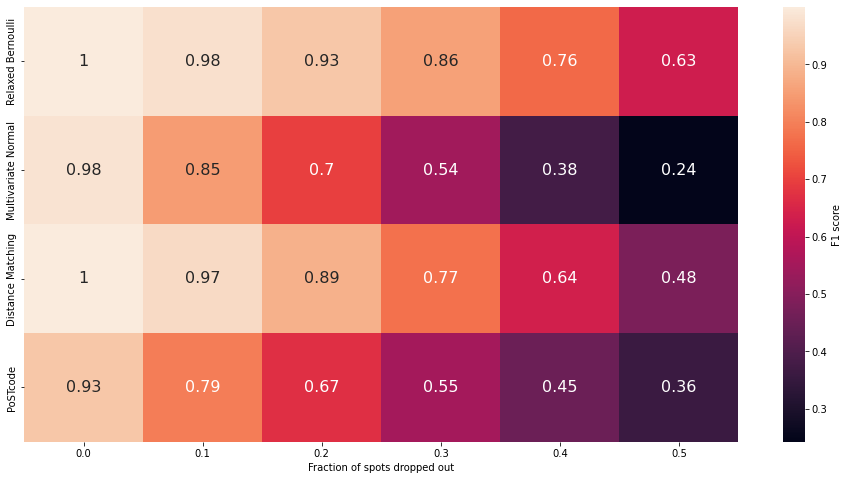

In [9]:
fig,ax = plt.subplots(figsize=(16,8))
p = sns.heatmap(results.iloc[:,1:], annot=True, ax=ax,
                cbar_kws={'label': 'F1 score'},
                annot_kws={'fontsize': 16})
p.set_yticklabels(['Relaxed Bernoulli',
                   'Multivariate Normal',
                   'Distance Matching',
                   'PoSTcode'])
p.set(xlabel='Fraction of spots dropped out')
plt.show()